In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [18]:
# Load verification trajectory
nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')

pyna_settings = pyna.load_settings(case_name='stca')
pyna_settings.engine_file_name = "engine_deck_stca.csv"
pyna_settings.output_directory_name = "STCB/V2"
pyna_settings.save_results = True
pyna_settings.max_iter = 150

py = pyna(pyna_settings)

## V2

In [19]:
TS = 0.56
z_cb = 25.0
results_v2 = dict()
file_name = pyna_settings.ac_name + '_' + str(np.round(z_cb,2)) + '_' + str(np.round(TS,2)) + '.sql'
results_v2[str(TS)+'_'+str(z_cb)] = py.load_results(file_name)


In [4]:
# Sweep lists
py.settings.output_directory_name = 'STCB/V2'

z_cb_lst_v2 = np.hstack((np.linspace(25, 350, 14), np.linspace(400, 750, 8)))
TS_cb_lst_v2 = np.hstack(([0.56, 0.575], np.linspace(0.6, 1., 17)))

# Load results
results_v2 = dict()

for j, TS in enumerate(TS_cb_lst_v2[:19]):
    for i, z_cb in enumerate(z_cb_lst_v2):
        file_name = pyna_settings.ac_name + '_' + str(np.round(z_cb,2)) + '_' + str(np.round(TS,2)) + '.sql'
        results_v2[str(TS)+'_'+str(z_cb)] = py.load_results(file_name)

## Vmax

In [6]:
# Sweep lists
py.settings.output_directory_name = 'STCB/Vmax'

z_cb_lst_vmax = np.hstack((np.linspace(25, 350, 14), np.linspace(400, 750, 8)))
TS_cb_lst_vmax = np.linspace(0.475, 1., 22)

# Load results
results_vmax = dict()

for j, TS in enumerate(TS_cb_lst_vmax):
    for i, z_cb in enumerate(z_cb_lst_vmax):
        file_name = pyna_settings.ac_name + '_' + str(np.round(z_cb,2)) + '_' + str(np.round(TS,2)) + '.sql'
        results_vmax[str(TS)+'_'+str(z_cb)] = py.load_results(file_name)

## Results

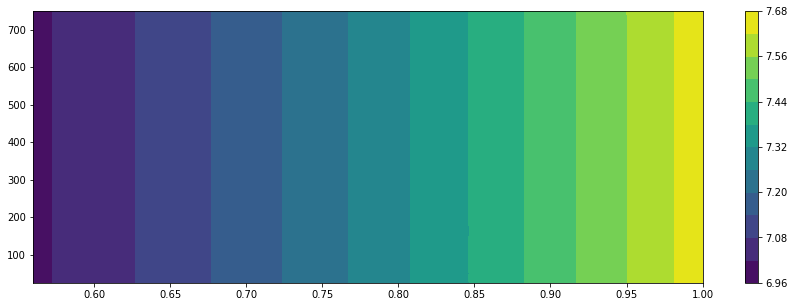

In [13]:
krot_v2 = np.zeros((np.size(z_cb_lst_v2), np.size(TS_cb_lst_v2)))
LD_v2 = np.zeros((np.size(z_cb_lst_v2), np.size(TS_cb_lst_v2)))

for j, TS in enumerate(TS_cb_lst_v2):
    for i, z_cb in enumerate(z_cb_lst_v2):
        krot_v2[i,j] = results_v2[str(TS)+'_'+str(z_cb)].get_val('phases.flapsdown.parameters:k_rot')[-1]
        LD_v2[i,j] = results_v2[str(TS)+'_'+str(z_cb)].get_val('phases.cutback.interpolated.L')[-1]/results_v2[str(TS)+'_'+str(z_cb)].get_val('phases.cutback.interpolated.D')[-1]
        
plt.figure(figsize=(15,5))
plt.contourf(TS_cb_lst_v2, z_cb_lst_v2, LD_v2, levels=10)
plt.colorbar()

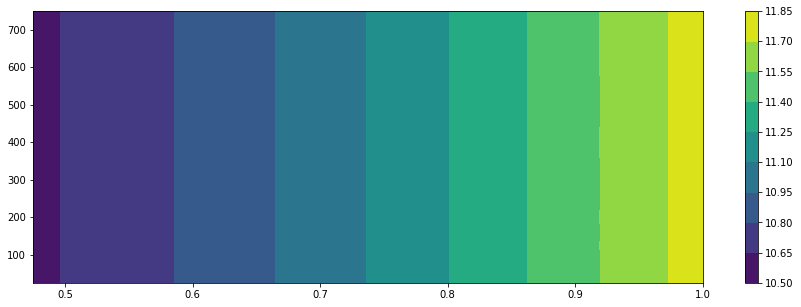

In [14]:
krot_vmax = np.zeros((np.size(z_cb_lst_vmax), np.size(TS_cb_lst_vmax)))
LD_vmax = np.zeros((np.size(z_cb_lst_vmax), np.size(TS_cb_lst_vmax)))

for j, TS in enumerate(TS_cb_lst_vmax):
    for i, z_cb in enumerate(z_cb_lst_vmax):
        krot_vmax[i,j] = results_vmax[str(TS)+'_'+str(z_cb)].get_val('phases.flapsdown.parameters:k_rot')[-1]
        LD_vmax[i,j] = results_vmax[str(TS)+'_'+str(z_cb)].get_val('phases.cutback.interpolated.L')[-1]/results_vmax[str(TS)+'_'+str(z_cb)].get_val('phases.cutback.interpolated.D')[-1]
        
plt.figure(figsize=(15,5))
plt.contourf(TS_cb_lst_vmax, z_cb_lst_vmax, LD_vmax, levels=10)
plt.colorbar()